Code for initial data exploration using Pandas. Also a refresher on numpy and pandas.

Lets open a pupil labs csv

In [5]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os

recording_location = r"P:\Proyectos\2020\PY200016 - XSCAPE\Trabajo\00 XPERIMENTS\01 EXPERIMENTS_Santiago\01 ONGOING\Exp_Stgo_0001\SESSIONS\ES0001_S002_PC_EM\data\pupil_labs\002"

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

002/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    eye1.intrinsics
    eye1.mp4
    eye1_lookup.npy
    eye1_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    square_marker_cache
    surface_definitions_v01
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            annotations.csv
            blink_detection_report.csv
            blinks.csv
            export_info.csv
            fixation_report.csv
            fixations.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4
            world_timestamps.csv
            world_timestamps.npy
  

In [32]:
exported_pupil_csv = os.path.join(recording_location, 'exports', '000', 'pupil_positions.csv')
pupil_pd_frame = pd.read_csv(exported_pupil_csv)
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'gaze_positions.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)

In [29]:
list(pupil_pd_frame.columns)

['pupil_timestamp',
 'world_index',
 'eye_id',
 'confidence',
 'norm_pos_x',
 'norm_pos_y',
 'diameter',
 'method',
 'ellipse_center_x',
 'ellipse_center_y',
 'ellipse_axis_a',
 'ellipse_axis_b',
 'ellipse_angle',
 'diameter_3d',
 'model_confidence',
 'model_id',
 'sphere_center_x',
 'sphere_center_y',
 'sphere_center_z',
 'sphere_radius',
 'circle_3d_center_x',
 'circle_3d_center_y',
 'circle_3d_center_z',
 'circle_3d_normal_x',
 'circle_3d_normal_y',
 'circle_3d_normal_z',
 'circle_3d_radius',
 'theta',
 'phi',
 'projected_sphere_center_x',
 'projected_sphere_center_y',
 'projected_sphere_axis_a',
 'projected_sphere_axis_b',
 'projected_sphere_angle']

In [23]:
pupil_pd_frame.head()

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,14963.532079,0,0,0.967541,0.384912,0.601413,32.496613,pye3d 0.3.0 real-time,73.903172,76.528654,...,0.018373,-0.853685,1.690155,1.552422,-2.118296,114.033851,78.141415,165.699953,165.699953,0.0
1,14963.532079,0,0,0.967541,0.384946,0.601443,32.499603,2d c++,73.909576,76.522873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14963.532146,0,1,1.000000,0.305218,0.387613,36.263992,2d c++,58.601776,117.578255,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14963.532146,0,1,1.000000,0.305221,0.387696,36.252590,pye3d 0.3.0 real-time,58.602380,117.562393,...,-0.166674,-0.782323,1.777172,1.738252,-2.225184,109.252397,126.930874,174.366655,174.366655,0.0
4,14963.540161,1,0,0.968023,0.385050,0.601268,32.357941,pye3d 0.3.0 real-time,73.929623,76.556600,...,0.016104,-0.854217,1.682928,1.554692,-2.117337,114.033851,78.141415,165.699953,165.699953,0.0


<AxesSubplot:>

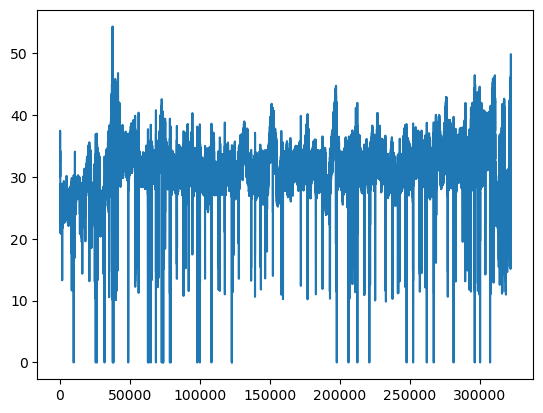

In [27]:
from IPython.display import display

# filter for 3d data
detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.3.0 real-time']
detector_3d_data['diameter'].plot()


In [34]:
gaze_data[~gaze_data['gaze_normal0_x'].isna()]

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,14963.532113,0,0.983771,0.399942,0.066707,14963.532079400002-0 14963.532146400003-1,-14.505282,32.922378,88.632190,23.728574,...,-25.714400,-0.312893,0.249550,0.916418,-34.966478,11.012091,-23.435481,0.177362,0.111243,0.977838
1,14963.536154,0,0.984012,0.400323,0.065457,14963.540161400002-0 14963.532146400003-1,-14.475106,33.094917,88.776928,23.728574,...,-25.714400,-0.312249,0.251891,0.915997,-34.966478,11.012091,-23.435481,0.177362,0.111243,0.977838
2,14963.540187,1,0.984012,0.400136,0.067585,14963.540161400002-0 14963.540213400001-1,-14.521010,32.949662,88.941078,23.728574,...,-25.714400,-0.312249,0.251891,0.915997,-34.966478,11.012091,-23.435481,0.176786,0.108375,0.978265
3,14963.544161,1,0.930840,0.398455,0.065550,14963.548109400002-0 14963.540213400001-1,-14.663942,32.866736,88.145076,23.728574,...,-25.714400,-0.315230,0.252805,0.914724,-34.966478,11.012091,-23.435481,0.176786,0.108375,0.978265
4,14963.548119,1,0.930840,0.399312,0.064600,14963.548109400002-0 14963.548129400002-1,-14.413248,32.676460,87.409585,23.728574,...,-25.714400,-0.315230,0.252805,0.914724,-34.966478,11.012091,-23.435481,0.180034,0.107436,0.977776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161132,15617.049645,38949,0.989164,0.178410,0.607726,15617.051697400002-0 15617.047592400002-1,-132.317656,-37.628726,223.087697,25.458028,...,-11.759294,-0.547881,-0.170866,0.818921,-43.025662,16.513962,-17.134758,-0.340101,-0.227631,0.912423
161133,15617.053636,38949,1.000000,0.178096,0.611982,15617.051697400002-0 15617.055574400001-1,-133.842452,-39.038034,225.194619,25.458028,...,-11.759294,-0.547881,-0.170866,0.818921,-43.025662,16.513962,-17.134758,-0.342194,-0.233762,0.910087
161134,15617.057625,38949,1.000000,0.172527,0.607783,15617.059676400002-0 15617.055574400001-1,-128.902410,-36.000926,212.014513,25.458028,...,-11.759294,-0.557708,-0.169694,0.812506,-43.025662,16.513962,-17.134758,-0.342194,-0.233762,0.910087
161135,15617.061640,38950,0.968571,0.172455,0.605060,15617.059676400002-0 15617.063604400002-1,-129.361944,-35.505472,212.804070,25.458028,...,-11.759294,-0.557708,-0.169694,0.812506,-43.025662,16.513962,-17.134758,-0.343065,-0.228823,0.911014


In [35]:
gaze_data.where()

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,...,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,14963.532113,0,0.983771,0.399942,0.066707,14963.532079400002-0 14963.532146400003-1,-14.505282,32.922378,88.632190,23.728574,...,-25.714400,-0.312893,0.249550,0.916418,-34.966478,11.012091,-23.435481,0.177362,0.111243,0.977838
1,14963.536154,0,0.984012,0.400323,0.065457,14963.540161400002-0 14963.532146400003-1,-14.475106,33.094917,88.776928,23.728574,...,-25.714400,-0.312249,0.251891,0.915997,-34.966478,11.012091,-23.435481,0.177362,0.111243,0.977838
2,14963.540187,1,0.984012,0.400136,0.067585,14963.540161400002-0 14963.540213400001-1,-14.521010,32.949662,88.941078,23.728574,...,-25.714400,-0.312249,0.251891,0.915997,-34.966478,11.012091,-23.435481,0.176786,0.108375,0.978265
3,14963.544161,1,0.930840,0.398455,0.065550,14963.548109400002-0 14963.540213400001-1,-14.663942,32.866736,88.145076,23.728574,...,-25.714400,-0.315230,0.252805,0.914724,-34.966478,11.012091,-23.435481,0.176786,0.108375,0.978265
4,14963.548119,1,0.930840,0.399312,0.064600,14963.548109400002-0 14963.548129400002-1,-14.413248,32.676460,87.409585,23.728574,...,-25.714400,-0.315230,0.252805,0.914724,-34.966478,11.012091,-23.435481,0.180034,0.107436,0.977776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161132,15617.049645,38949,0.989164,0.178410,0.607726,15617.051697400002-0 15617.047592400002-1,-132.317656,-37.628726,223.087697,25.458028,...,-11.759294,-0.547881,-0.170866,0.818921,-43.025662,16.513962,-17.134758,-0.340101,-0.227631,0.912423
161133,15617.053636,38949,1.000000,0.178096,0.611982,15617.051697400002-0 15617.055574400001-1,-133.842452,-39.038034,225.194619,25.458028,...,-11.759294,-0.547881,-0.170866,0.818921,-43.025662,16.513962,-17.134758,-0.342194,-0.233762,0.910087
161134,15617.057625,38949,1.000000,0.172527,0.607783,15617.059676400002-0 15617.055574400001-1,-128.902410,-36.000926,212.014513,25.458028,...,-11.759294,-0.557708,-0.169694,0.812506,-43.025662,16.513962,-17.134758,-0.342194,-0.233762,0.910087
161135,15617.061640,38950,0.968571,0.172455,0.605060,15617.059676400002-0 15617.063604400002-1,-129.361944,-35.505472,212.804070,25.458028,...,-11.759294,-0.557708,-0.169694,0.812506,-43.025662,16.513962,-17.134758,-0.343065,-0.228823,0.911014


In [42]:

gaze_pd_frame.loc[gaze_pd_frame['gaze_normal0_x'].isna(),'norm_pos_x','base_data'].head()


IndexingError: Too many indexers

In [41]:
gaze_pd_frame.loc[gaze_pd_frame['gaze_normal0_x'].isna(),'norm_pos_x','base_data'].head()


IndexingError: Too many indexers

In [39]:
gaze_data.iloc[0:1,0:1]

,gaze_timestamp
0,14963.532113


In [42]:
gaze_data.iloc[0:3, 3] = "anonymous"

In [43]:
gaze_data

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,433649.976742,0,1,anonymous,0.668810,0.339989,41.475529,pye3d 0.3.0 real-time,128.411516,126.722194,...,-0.366668,-0.630926,1.914053,1.946221,-2.396338,179.599049,150.549199,192.661459,192.661459,0.0
1,433649.976742,0,1,anonymous,0.668786,0.339946,41.471268,2d c++,128.406998,126.730415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,433649.988276,0,1,anonymous,0.666502,0.324230,41.475302,pye3d 0.3.0 real-time,127.968474,129.747878,...,-0.343292,-0.639870,1.907796,1.921216,-2.392094,179.599049,150.549199,192.661459,192.661459,0.0
3,433649.988276,0,1,0.99,0.666431,0.324101,41.457832,2d c++,127.954765,129.772644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,433649.996211,0,1,0.99,0.662953,0.296110,43.050218,pye3d 0.3.0 real-time,127.287058,135.146881,...,-0.288255,-0.653849,1.966806,1.863201,-2.389959,179.599049,150.549199,192.661459,192.661459,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38857,433812.852045,4820,1,1.0,0.522636,0.233286,37.769997,2d c++,100.346176,147.209045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38858,433812.859945,4821,1,1.0,0.523007,0.233796,38.070346,pye3d 0.3.0 real-time,100.417400,147.111095,...,-0.099185,-0.259011,1.886352,1.670145,-2.878266,179.555915,150.469966,184.150793,184.150793,0.0
38859,433812.859945,4821,1,1.0,0.523007,0.233792,38.070038,2d c++,100.417358,147.112000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38860,433812.868047,4821,1,1.0,0.523579,0.234734,37.893913,pye3d 0.3.0 real-time,100.527137,146.930987,...,-0.101485,-0.261339,1.878258,1.672456,-2.875778,179.555915,150.469966,184.150793,184.150793,0.0


Basic Statistwics   

In [44]:
gaze_data.describe()

,pupil_timestamp,world_index,eye_id,norm_pos_x,norm_pos_y,diameter,ellipse_center_x,ellipse_center_y,ellipse_axis_a,ellipse_axis_b,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
count,38862.000000,38862.000000,38862.0,38862.000000,38862.000000,3.886200e+04,38862.000000,38862.000000,38862.000000,3.886200e+04,...,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.000000,19431.0
mean,433731.599810,2401.382430,1.0,0.609238,0.258833,5.088313e+05,116.973628,142.304122,24.827932,5.088313e+05,...,-0.159814,-0.580771,1.624682,1.732293,-2.427268,179.450011,150.274295,191.117573,191.117573,0.0
std,46.981174,1393.927212,0.0,0.098776,0.106747,7.377595e+07,18.964914,20.495383,6.306606,7.377595e+07,...,0.110913,0.159505,0.207730,0.113279,0.600992,2.240588,0.851681,5.801308,5.801308,0.0
min,433649.976742,0.000000,1.0,0.000000,-0.032841,0.000000e+00,0.000000,-32.000000,0.000000,0.000000e+00,...,-0.569871,-0.986098,0.457021,1.110084,-3.141437,175.153175,148.786836,180.007233,180.007233,0.0
25%,433691.090119,1187.000000,1.0,0.593144,0.230549,3.304379e+01,113.883701,141.295116,24.352599,3.304379e+01,...,-0.197958,-0.651120,1.485941,1.689148,-2.510677,177.085673,149.441533,186.000720,186.000720,0.0
50%,433731.781071,2401.000000,1.0,0.630591,0.243361,3.463167e+01,121.073466,145.274774,26.399848,3.463167e+01,...,-0.163729,-0.627891,1.565195,1.735266,-2.448650,180.169044,150.357614,192.239067,192.239067,0.0
75%,433772.262004,3609.000000,1.0,0.647640,0.264088,3.706902e+01,124.346888,147.734549,27.827553,3.706902e+01,...,-0.118076,-0.560425,1.771494,1.770071,-2.418030,181.621799,150.828585,196.250964,196.250964,0.0
max,433812.868047,4821.000000,1.0,0.934342,1.166667,1.271867e+10,179.393585,198.305461,59.295278,1.271867e+10,...,0.444586,0.497403,2.160720,2.177145,3.141403,182.296563,151.859818,198.338087,198.338087,0.0


What about for each eye

In [47]:
gaze_data.groupby('eye_id').describe()

pupil_timestamp                                                         \
                 count          mean        std            min            25%   
eye_id                                                                          
1              38862.0  433731.59981  46.981174  433649.976742  433691.090119   

                                                    world_index              \
                  50%            75%            max       count        mean   
eye_id                                                                        
1       433731.781071  433772.262004  433812.868047     38862.0  2401.38243   

        ... projected_sphere_axis_b             projected_sphere_angle       \
        ...                     75%         max                  count mean   
eye_id  ...                                                                   
1       ...              196.250964  198.338087                19431.0  0.0   

                                      
        std  min  25%  50%  75%  max  
eye_id                                
1       0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 248 columns]

<AxesSubplot:>

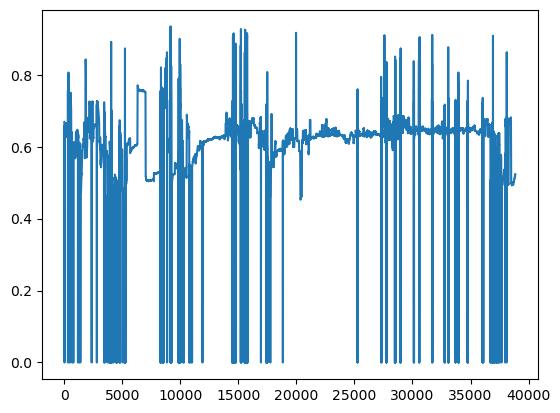

In [49]:
gaze_data['norm_pos_x'].plot()

Lets check the quick plots available in pandas

In [56]:
[method_name for method_name in dir(gaze_data.plot) if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:>

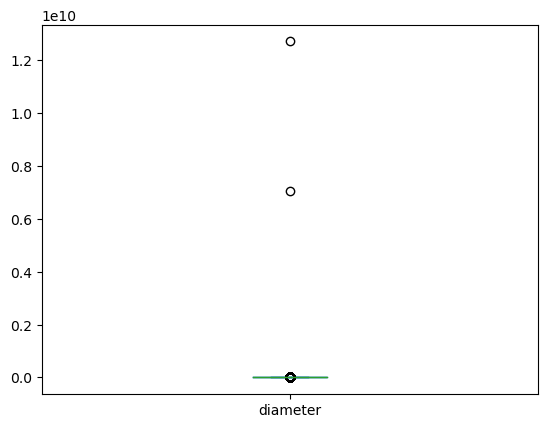

In [58]:
gaze_data['diameter'].plot.box()

gaze_data.

In [ ]:
I want each of the columns in a separate subplot.

